In [620]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Read CSV
city_data = pd.read_csv('city_data.csv')
ride_data = pd.read_csv('ride_data.csv')

# Merge our two data frames together
combined_data = pd.merge(ride_data,city_data, on='city',how='left')
data_bycity=combined_data.groupby(['city','type'])
data_bycity=pd.DataFrame(round(data_bycity.mean(),2))
data_bycity=data_bycity.reset_index()
data_bycity.head(10)

,city,type,fare,ride_id,driver_count
0,Alvarezhaven,Urban,23.93,5.351586e+12,21.0
1,Alyssaberg,Urban,20.61,3.536678e+12,67.0
2,Anitamouth,Suburban,37.32,4.195870e+12,16.0
3,Antoniomouth,Urban,23.62,5.086800e+12,21.0
4,Aprilchester,Urban,21.98,4.574788e+12,49.0
5,Arnoldview,Urban,25.11,5.021952e+12,41.0
6,Campbellport,Suburban,33.71,5.805424e+12,26.0
7,Carrollbury,Suburban,36.61,4.274615e+12,4.0
8,Carrollfort,Urban,25.40,4.759008e+12,55.0
9,Clarkstad,Suburban,31.05,6.682745e+12,21.0


In [621]:
# Find out total number of rides per city
ride_city=ride_data.groupby('city')['ride_id'].count()
ride_city=pd.DataFrame(ride_city)
ride_city=ride_city.reset_index()
ride_city = ride_city.rename(columns={'ride_id':'Total number of rides'})
ride_city.head()

,city,Total number of rides
0,Alvarezhaven,31
1,Alyssaberg,26
2,Anitamouth,9
3,Antoniomouth,22
4,Aprilchester,19


In [622]:
# create a final dataframe which contain city type, total number of rides, total drivers and average fare per city.
df=data_bycity.copy()

df = pd.merge(df,ride_city, on='city')

df = df.loc[:,['city', 'type', 'Total number of rides', 'driver_count', 'fare',]]

df = pd.DataFrame(df)
df.rename(columns={'city':'City',
                   'type':'Type',
                   'fare':'Average fare',
                   'driver_count':'Total drivers'
                  })
df.head()

,city,type,Total number of rides,driver_count,fare
0,Alvarezhaven,Urban,31,21.0,23.93
1,Alyssaberg,Urban,26,67.0,20.61
2,Anitamouth,Suburban,9,16.0,37.32
3,Antoniomouth,Urban,22,21.0,23.62
4,Aprilchester,Urban,19,49.0,21.98


In [623]:
# create scatter plot: X axis: Total number of rides per city, Y axis: Average fares and city type plotted

u = df.type.str.count(r'Urban')
s = df.type.str.count(r'Suburban')
r = df.type.str.count(r'Rural')

x = (df['Total number of rides'] * u) 
y = (df['fare'] * u)
plt.scatter(x, y, alpha=0.5, c='coral', edgecolors='black', s = df['driver_count']*10, label="Urban", linewidths=1)

x = (df['Total number of rides'] * s)
y = (df['fare'] * s)
plt.scatter(x, y, alpha=0.5, c='skyblue', edgecolors='black', s = df['driver_count']*10, label='Suburban', linewidths=1)

x = (df['Total number of rides'] * r)
y = (df['fare'] * r)
plt.scatter(x, y, alpha=0.5, c='gold', edgecolors='black', s = df['driver_count']*10, label='Rural', linewidths=1)

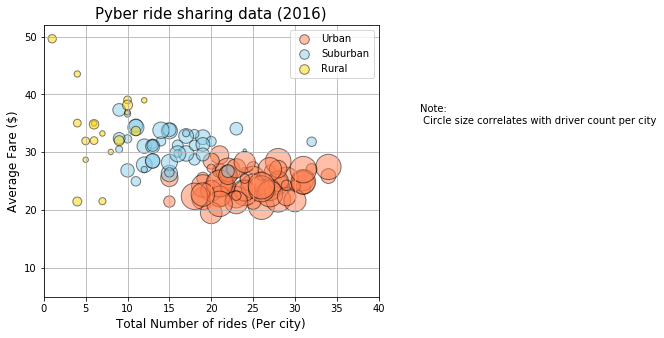

In [624]:
# circle size corelated with driver count per city
# ploting graph

plt.ylim(5, 52)
plt.xlim(0, 40)
plt.ylabel('Average Fare ($)', fontsize = 12)
plt.xlabel('Total Number of rides (Per city)', fontsize = 12)
plt.title("Pyber ride sharing data (2016)", fontsize = 15)
plt.grid()
plt.legend(loc="upper right", scatterpoints=1, fontsize=10, markerscale=0.5)
note = ("Note:\n Circle size correlates with driver count per city")
plt.text(45,35,note)
plt.show()

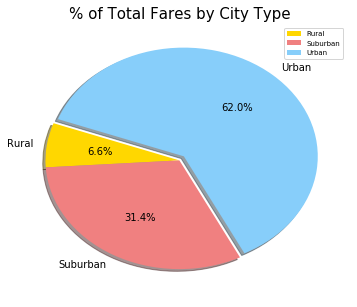

In [625]:
#% of Total Fares by City Type
combined_data1=pd.DataFrame(combined_data.groupby("type")["fare"].sum())
combined_data1['% of total fare'] = combined_data1['fare']/combined_data1['fare'].sum()*100
combined_data1=combined_data1.reset_index()

# Pie chart
types = combined_data1['type']
total_fare = combined_data1['% of total fare'] # Data which we want to show as a pie chart
colors = ["gold", "lightcoral", "lightskyblue"]
explode = (0, 0, 0.05)
plt.pie(total_fare, explode=explode, labels=types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)

#Plotted pie chart based on city type and % of total fares by city 
plt.title('% of Total Fares by City Type', fontsize=15)
plt.legend(loc="upper right", scatterpoints=1, fontsize=7)
plt.axis("off")
plt.show()

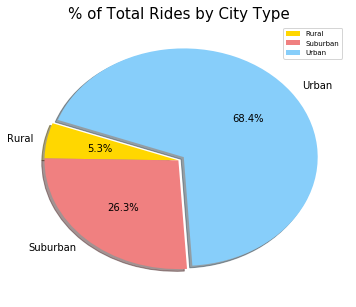

In [626]:
# created dataframe which contain total number of rides and % of total rides per city type
df2 = pd.DataFrame(df.groupby('type')['Total number of rides'].sum())
df2 = df2.reset_index()
df2['% of total rides'] = df2['Total number of rides']/df2['Total number of rides'].sum()* 100
df2

# Pie chart
types = df2['type']
total_rides = df2['% of total rides'] # Data which we want to show as a pie chart
colors = ["gold", "lightcoral", "lightskyblue"]
explode = (0, 0, 0.05)
plt.pie(total_rides, explode=explode, labels=types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)

#Plotted pie chart based on city type and % of total fares by city 
plt.title('% of Total Rides by City Type', fontsize=15)
plt.legend(loc="upper right", scatterpoints=1, fontsize=7)
plt.axis("off")
plt.show()

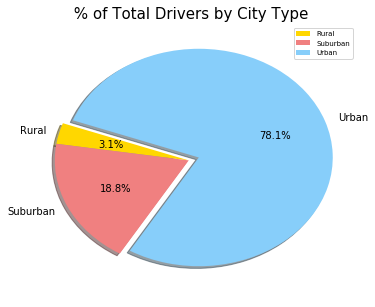

In [627]:
# created dataframe which contain total driver counts and % of total drivers based on city type
df3 = df.groupby('type')['driver_count'].sum()
df3 = pd.DataFrame(df3)
df3 = df3.reset_index()
df3['% of total drivers'] = df3['driver_count']/df3['driver_count'].sum()* 100
df3

# Pie chart
types = df3['type']
total_drivers = df3['% of total drivers'] # Data which we want to show as a pie chart
colors = ["gold", "lightcoral", "lightskyblue"]
explode = (0, 0, 0.08)
plt.pie(total_drivers, explode=explode, labels=types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)

# pie chart based on % of total drivers by city type
plt.title(' % of Total Drivers by City Type', fontsize=15)
plt.legend(loc="upper right", scatterpoints=1, fontsize=7)
plt.axis("off")
plt.show()